<a href="https://colab.research.google.com/github/MichelleRakotovao/Algo-ML/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Le dataset Iris est l'un des ensembles de données les plus célèbres en apprentissage automatique et en statistiques. Il est souvent utilisé comme ensemble de données pour comprendre la classification et algorithmes de clurstering en apprentissage automatique.

  Origine:

*   Les données proviennent de mesures sur des fleurs d'iris collectées par le botaniste Edgar Anderson.
*   Créé par Ronald A. Fisher en 1936.
*   Publié dans son article sur l'analyse discriminante linéaire, intitulé "The Use of Multiple Measurements in Taxonomic Problems.


  Variables:
Le longeur sépale ou Sepal Length : en cm
Le largeur des sépales ou Sepal : en cm
Le Longeur du pétale ou Petal Length : en cm
La largeur du pétale ou Petal width : en cm, et qui a trois classes : Iris setosa, iris versicolor, iris virginica

  Objectif:

*   Exploration de données : Étudier la distribution et les corrélations entre les dimensions des sépales et des pétales.
*   Classification : Utiliser les mesures (longueur et largeur des sépales et pétales) pour prédire l'espèce d'iris.
*   Analyse discriminante : Étudier les relations entre les variables pour distinguer les différentes espèces.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# visualisation pertinant du data iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colums = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url,header=None,names=colums)
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


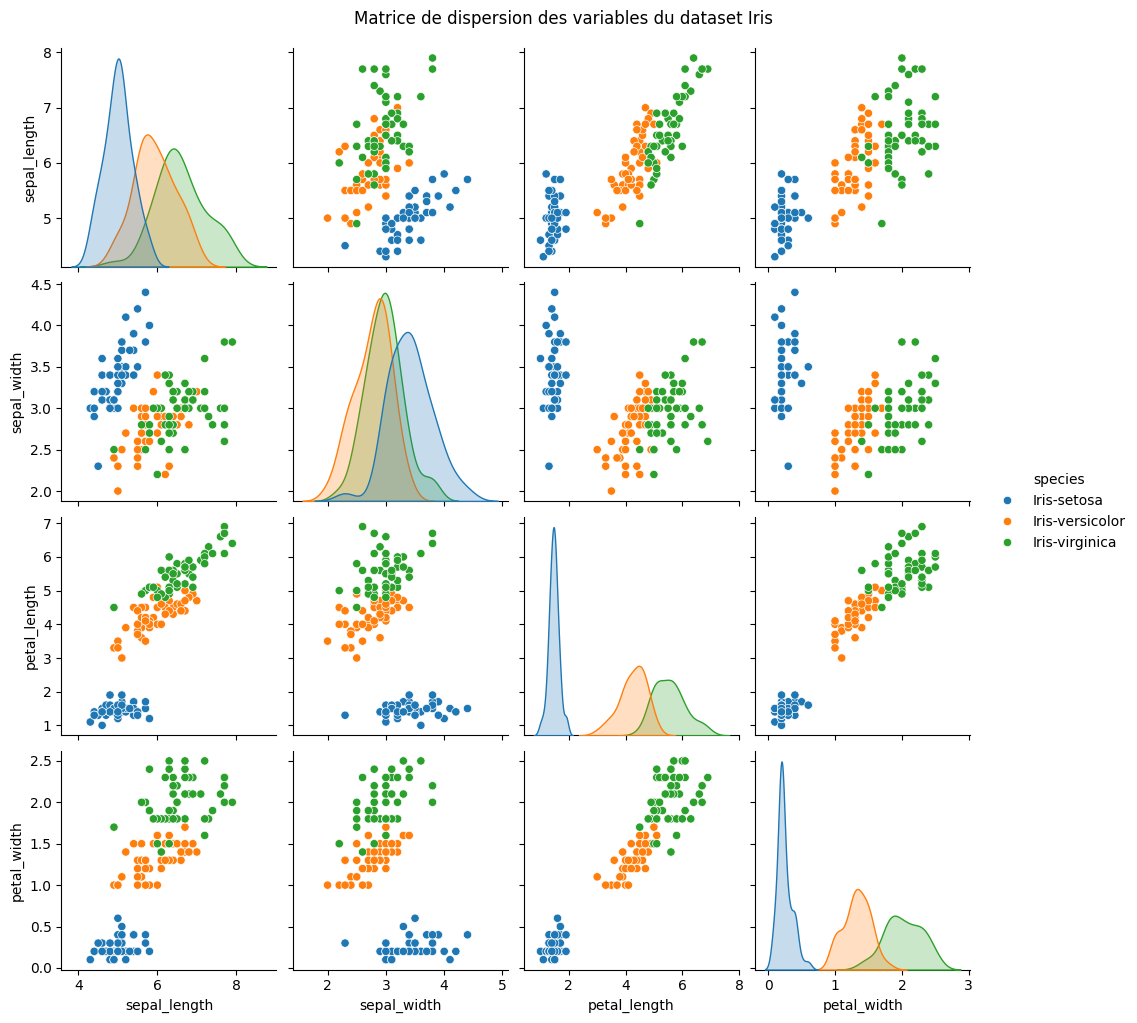

In [ ]:
#represatation sous frome Matrice de dispersion (Pairplot)
sns.pairplot(data, hue="species", diag_kind="kde")
plt.suptitle("Matrice de dispersion des variables du dataset Iris", y=1.02)
plt.show()

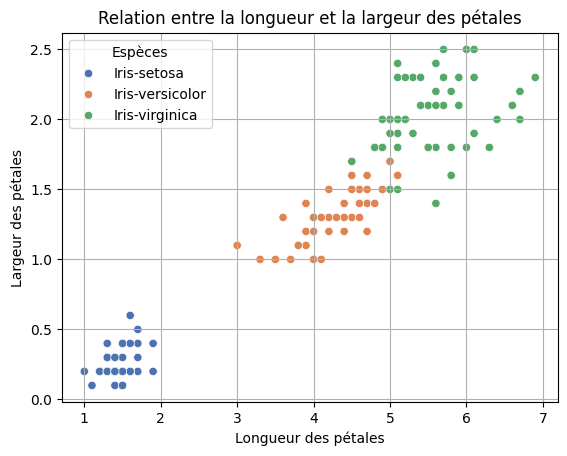

In [ ]:
#represantation spus forme Nuages de points (Scatter Plot)
sns.scatterplot(data=data, x="petal_length", y="petal_width", hue="species", palette="deep")
plt.title("Relation entre la longueur et la largeur des pétales")
plt.xlabel("Longueur des pétales")
plt.ylabel("Largeur des pétales")
plt.legend(title="Espèces")
plt.grid(True)
plt.show()


<ipython-input-9-d0becf6cfc83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="species", y="petal_length", palette="coolwarm")


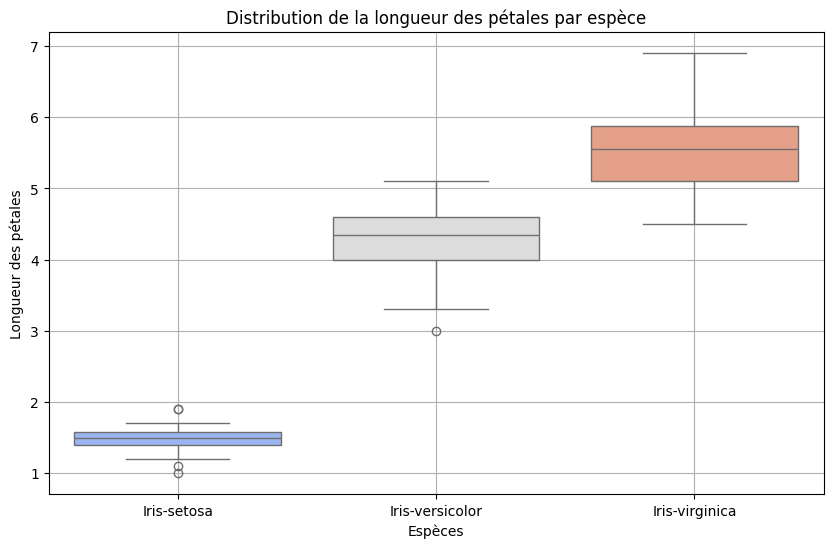

In [ ]:
# represantation sous forme Boîtes à moustaches (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="species", y="petal_length", palette="coolwarm")
plt.title("Distribution de la longueur des pétales par espèce")
plt.xlabel("Espèces")
plt.ylabel("Longueur des pétales")
plt.grid(True)
plt.show()


Observations:

1.   Variables les plus discrimante
*   Les graphiques comparant petal_length et petal_width montrent des séparations claires entre les espèces. Ces deux variables sont donc les plus utiles pour classifier les espèces.

2.  Variables moins discriminantes
*   Les relations entre sepal_length et sepal_width montrent que ces deux variables ne suffisent pas pour séparer versicolor et virginica. Cependant, elles aident encore à différencier setosa des deux autres espèces.

3.  Séparation des especes:
*   Setosa : Facile à séparer grâce à des valeurs plus faibles pour petal_length et petal_width.
*   Versicolor et Virginica : Ces deux espèces ont des valeurs qui se chevauchent pour certaines variables, mais elles peuvent être distinguées en combinant petal_length et petal_width.







In [ ]:
### Regression logistique
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colums = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url,header=None,names=colums)

data['species'] = data['species'].astype('category').cat.codes

X = data.iloc[:, :-1]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Exactitude de la régression logistique : {accuracy_logreg}")
print(f"Matrice de confusion : \n{conf_matrix_logreg}")
print(f"Rapport de classification : \n{classification_report_logreg}")





Exactitude de la régression logistique : 1.0
Matrice de confusion : 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Rapport de classification : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
## KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colums = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url,header=None,names=colums)

data['species'] = data['species'].astype('category').cat.codes

X = data.iloc[:, :-1]
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_k = None
best_accuracy = 0

for k in range(3, 21):  # Tester K de 1 à 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_knn)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Afficher les résultats
print(f"Meilleure valeur de K : {best_k}")
print(f"Exactitude avec K = {best_k} : {best_accuracy}")


Meilleure valeur de K : 3
Exactitude avec K = 3 : 1.0


Comparaison

1.   Regression logistique
  
2.   Élément de liste


   
